# Problem Statement : Customer Segmentation for Business Insights

# Background 
In the era of data-driven decision-making, organizations accumulate vast amounts of historical data, including customer interactions, purchases, and behavioral patterns. Analyzing this data to uncover meaningful insights and identify distinct customer segments is crucial for optimizing business strategies, marketing campaigns, and overall performance.

# Objective:
- The primary objective of this project is to leverage historical data to perform customer segmentation, thereby gaining deeper insights into customer behavior and preferences. 
** **
- By clustering customers into meaningful segments, we aim to:
    1. Tailor marketing and product strategies to specific segments.
    2. Improve customer targeting, engagement, and retention.
    3. Optimize resource allocation and revenue generation

# Solution Proposed: LRFMV Analysis for Enhanced Customer Segmentation
- In response to the need for improved customer segmentation and business insights, an innovative solution known as LRFMV (Length, Recency, Frequency, Monetary, Volume) Analysis has been propose by Mahfuza et. al(2022). This method builds upon the foundation of the widely used RFM (Recency, Frequency, Monetary) model while addressing its limitations and incorporating additional dimensions for a more comprehensive understanding of customer behavior and profitability.
** **
- **Key Enhancements**:

    **1. Length (L)**: Introduce the "Length" component to quantify the duration of a customer's relationship with the company. This crucial dimension captures the long-term and short-term dynamics of customer engagement, allowing us to differentiate between loyal, occasional, and new customers.

    **2. Volume (V)**: This component is introduced to bridge the gap between purchase quantity and profitability. By assessing the volume of purchases in relation to profit generated, we gain valuable insights into the customer's impact on the company's bottom line.

** **
- **Utilization of Unsupervised Clustering**

    - After the application of LRFMV Analysis, we employ the K-Means clustering algorithm to group customers into meaningful segments. The choice of the optimal number of clusters is made through a rigorous evaluation process. We utilize the Elbow method and Silhouette score to determine the most suitable number of clusters.


# Key Term Defination 

**1. Recency (R):**
   - **Definition:** Recency refers to how recently a customer has interacted or made a purchase with the company. It measures the time elapsed since the last customer activity.

**2. Frequency (F):**
   - **Definition:** Frequency represents how often a customer engages with the company or makes purchases. It quantifies the customer's repeated interactions.

**3. Monetary (M):**
   - **Definition:** Monetary reflects the monetary value of a customer's purchases or transactions. It measures the amount of money spent by the customer.

**4. Length (L):**
   - **Definition:** Length, introduced in the LRFMV model, measures the duration or length of a customer's relationship with the company. It assesses both the short-term and long-term engagement.

**5. Volume (V):**
   - **Definition:** Volume, also introduced in the LRFMV model, evaluates the volume or quantity of a customer's purchases. It considers the quantity of items bought or the scale of transactions and relates to the Profitablity.


# Import the Required Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_excel('Online Retail.xlsx')

# Data Understanding

In [134]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [136]:
df.shape

(541909, 8)

In [137]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Observation 
- Quantity is having minimum value negative.
- Unit Price is having minimum value negative.
- Maximum value is much higher than 75%. Probable chance of outlier in the given data set.
- CustomerID is a categorical Variable

# Tasks
- Task to handle the negative values
    - check the rows containing negative values

- Task to handle data type
    - Change the data type for the customer id.

- Task for maximum and minimum value 
    - Need to check the data more precisely and than decide the strategy.

In [138]:
df[df.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


# Observation
- There are Some Invoice with "C" Character.
- Stock Code is having Characters as the code

# Task 
- Assuming Invoice with Character C is cancelled product hence can be dropped.

In [139]:
df[df.UnitPrice<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


# Observation 
- There are some of the data point consisting of 0 and negative value.

# Task 
- As no product can be of 0 and negative price hence drop it.

In [140]:
df_new = df[(df.UnitPrice>0) & (df.Quantity>0)]

In [141]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [142]:
#Checking if there are more cancelled product
df_new[df_new.InvoiceNo.astype(str).str.contains('C',na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Checking missing values

In [143]:
df_new.isnull().mean()*100.0

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.942275
Country         0.000000
dtype: float64

# Observation 
- Missing Values are present 
- Customer Id can be deleted directly

In [144]:
df_new.dropna(inplace=True)
df_new.isnull().mean()*100.0

C:\Users\Umang\AppData\Local\Temp\ipykernel_27492\2796990996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

# Check Duplicate

In [145]:
print(f" Total Duplicated Rows : {df_new.duplicated().sum()}")

 Total Duplicated Rows : 5192


In [146]:
df_new = df_new[~df_new.duplicated()]

In [147]:
df_new.shape

(392692, 8)

In [148]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [149]:
df_new["CustomerID"] = df_new["CustomerID"].astype(str)

In [150]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


In [151]:
df_new.describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


# Lets check outlier

In [152]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df_new, "Quantity")
replace_with_thresholds(df_new, "UnitPrice")

In [153]:
df_new.describe()

,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,11.950205,2.899931
std,25.653990,3.237620
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,298.500000,37.060000


# Observation and Assumption
- Since above data is having high outlier and for the propesed methedology we are going to calculate the Total Price and check the profitable customers so for that just making higher quanties and price in one cluster which can be in the one class after the analysis.

# Now data is cleaned and in correct Data type. !!!!! Start Feature Engineering and Model Creation
** **

# Feature Engineering for the LRFMV Model

In [154]:
df_new["Total"] = df_new["Quantity"]*df_new["UnitPrice"]

In [155]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [156]:
df_new.shape

(392692, 9)

In [157]:
# Recency Value 
df_new["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

# Assumption
- Lets consider the last date of transaction after the maximum date so that Recency does not become zero.
- For the marketing strategies lets consider month end will be the final transaction date so that decision makers can start planning with new month.

In [158]:
latest_date = df_new["InvoiceDate"].max() + pd.offsets.MonthEnd(0)
latest_date

Timestamp('2011-12-31 12:50:00')

In [159]:
rfm = df_new.groupby("CustomerID").agg({"InvoiceDate": lambda InvoiceDate: (latest_date- InvoiceDate.max()).days,
                                    "InvoiceNo": lambda InvoiceNo: InvoiceNo.nunique(),
                                    "Total": lambda Total: Total.sum()})

rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total': 'Monetary'}, inplace=True)

In [160]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,310.44
12347.0,23,7,4310.00
12348.0,96,4,1770.78
12349.0,40,1,1491.72
12350.0,331,1,331.46
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,2,178.05


In [161]:
Length = df_new.groupby('CustomerID').agg({'InvoiceDate' : lambda x: (x.max() - x.min()).days})

In [162]:
Length.shape

(4338, 1)

In [163]:
rfm["Length"] = Length
rfm.head()

,Recency,Frequency,Monetary,Length
CustomerID,,,,
12346.0,347,1,310.44,0
12347.0,23,7,4310.00,365
12348.0,96,4,1770.78,282
12349.0,40,1,1491.72,0
12350.0,331,1,331.46,0


In [164]:
# Calculation of Volume 
x = df_new.groupby(['CustomerID', 'InvoiceDate'])["Quantity"].mean().reset_index()
volume = x.groupby('CustomerID').agg( {"Quantity": lambda x : x.mean()})
volume
print(volume.shape)

(4338, 1)


In [165]:
rfm["Volume"] = volume

In [166]:
rfm.head()

,Recency,Frequency,Monetary,Length,Volume
CustomerID,,,,,
12346.0,347,1,310.44,0,298.500000
12347.0,23,7,4310.00,365,13.799245
12348.0,96,4,1770.78,282,75.016176
12349.0,40,1,1491.72,0,8.643836
12350.0,331,1,331.46,0,11.588235


In [167]:
rfm.shape

(4338, 5)

# Finally Feature Engineering is completed !!!! Ready to model
** **

# Rescalling Features 

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [169]:
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm)
rfm_df_scaled.shape

(4338, 5)

In [170]:
rfm_scaled = pd.DataFrame(rfm_df_scaled)
rfm_scaled.columns = rfm.columns
rfm_scaled.head()

,Recency,Frequency,Monetary,Length,Volume
0,2.334574,-0.425097,-0.204675,-0.988065,8.949168
1,-0.905340,0.354417,0.314677,1.776577,-0.115996
2,-0.175360,-0.035340,-0.015046,1.147905,1.833214
3,-0.735345,-0.425097,-0.051283,-0.988065,-0.280150
4,2.174578,-0.425097,-0.201945,-0.988065,-0.186397


# Model Building

C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

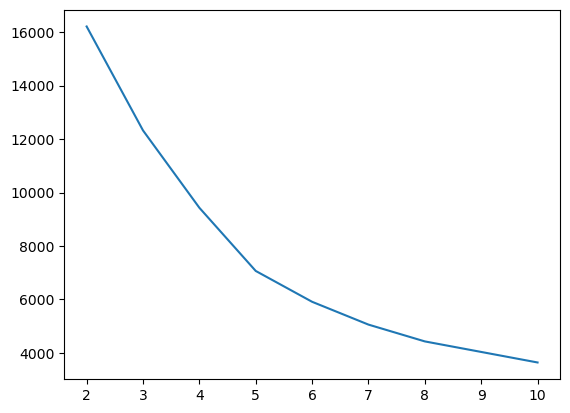

In [193]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

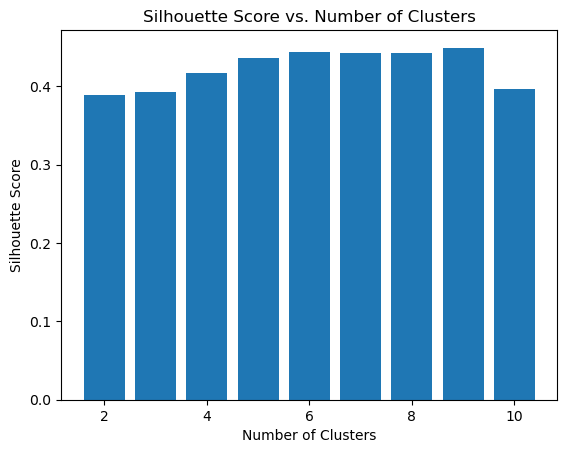

In [172]:

cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    # Fit the clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)  # X is your data

    # Calculate silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Create an elbow plot
plt.bar(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Based on WCSS and Sillhout Score it can be infered that number of cluster can be 5

# After Cluster 5 it increased bit but at last gradually dropped. 

In [173]:
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

C:\Users\Umang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=5, random_state=42)

In [174]:
 kmeans.labels_

array([3, 1, 1, ..., 4, 1, 4])

In [175]:
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,Recency,Frequency,Monetary,Length,Volume,Cluster_Id
CustomerID,,,,,,
12346.0,347,1,310.44,0,298.500000,3
12347.0,23,7,4310.00,365,13.799245,1
12348.0,96,4,1770.78,282,75.016176,1
12349.0,40,1,1491.72,0,8.643836,4
12350.0,331,1,331.46,0,11.588235,0


<BarContainer object of 4338 artists>

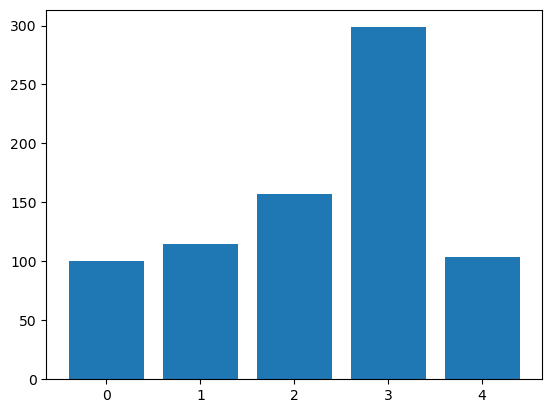

In [176]:
plt.bar(rfm['Cluster_Id'], rfm['Volume'])

In [177]:
rfm.groupby(['Cluster_Id']).agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean', 'Length':'mean', 'Volume':'mean'}).round(0)

,Recency,Frequency,Monetary,Length,Volume
Cluster_Id,,,,,
0,277.0,2.0,442.0,22.0,12.0
1,53.0,7.0,2917.0,281.0,15.0
2,28.0,84.0,104428.0,361.0,69.0
3,122.0,6.0,4836.0,122.0,197.0
4,76.0,2.0,705.0,46.0,13.0


In [178]:
rfm[["Recency",'Frequency','Monetary','Length', 'Volume']].mean()

Recency       113.536422
Frequency       4.272015
Monetary     1886.652564
Length        130.448594
Volume         17.442231
dtype: float64

In [179]:
average_values_data = rfm[["Recency",'Frequency','Monetary','Length', 'Volume']].mean()

# Create a new DataFrame to store the cluster information
cluster_info = pd.DataFrame()

# Iterate through each cluster
for cluster_id in rfm['Cluster_Id'].unique():
    # Select rows belonging to the current cluster
    cluster_data = rfm[rfm['Cluster_Id'] == cluster_id]
    
    # Calculate the average values for this cluster
    average_values_cluster = cluster_data[["Recency",'Frequency','Monetary','Length', 'Volume']].mean()
    
    # Compare the values with the overall average and assign labels
    labels = []
    for col in ["Recency",'Frequency','Monetary','Length', 'Volume']:
        if average_values_cluster[col] > average_values_data[col]:
            labels.append('High')
        else:
            labels.append('Low')
    
    # Create a row for this cluster in the cluster_info DataFrame
    cluster_info = cluster_info.append({
        'Cluster_Id': cluster_id,
        'R_Label': labels[0],
        'F_Label': labels[1],
        'M_Label': labels[2],
        'L_Label': labels[3],
        'V_Label': labels[4]
    }, ignore_index=True)


# Print the resulting DataFrame
print(cluster_info)

   Cluster_Id R_Label F_Label M_Label L_Label V_Label
0           3    High    High    High     Low    High
1           1     Low    High    High    High     Low
2           4     Low     Low     Low     Low     Low
3           0    High     Low     Low     Low     Low
4           2     Low    High    High    High    High


C:\Users\Umang\AppData\Local\Temp\ipykernel_27492\3945636124.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({
C:\Users\Umang\AppData\Local\Temp\ipykernel_27492\3945636124.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({
C:\Users\Umang\AppData\Local\Temp\ipykernel_27492\3945636124.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({
C:\Users\Umang\AppData\Local\Temp\ipykernel_27492\3945636124.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_info = cluster_info.append({
C:\Users\Umang\AppData\Local\Temp\ipyker

In [180]:
cluster_info

,Cluster_Id,R_Label,F_Label,M_Label,L_Label,V_Label
0,3,High,High,High,Low,High
1,1,Low,High,High,High,Low
2,4,Low,Low,Low,Low,Low
3,0,High,Low,Low,Low,Low
4,2,Low,High,High,High,High


In [181]:
cluster_Segmentation = pd.DataFrame({"Cluster_Id" :  [0,1,2,3,4], 
            "Segment" : ["One Time Customer", "Loyal Customer", "VIP Customer", "Past Transactional Driven Customer", "New Customer"]})

In [182]:
segmentaion_result = cluster_info.merge(cluster_Segmentation, on = 'Cluster_Id', how= 'inner')

In [183]:
segmentaion_result

,Cluster_Id,R_Label,F_Label,M_Label,L_Label,V_Label,Segment
0,3,High,High,High,Low,High,Past Transactional Driven Customer
1,1,Low,High,High,High,Low,Loyal Customer
2,4,Low,Low,Low,Low,Low,New Customer
3,0,High,Low,Low,Low,Low,One Time Customer
4,2,Low,High,High,High,High,VIP Customer


In [184]:
# Final Result
merged_df = rfm.merge(segmentaion_result, on = "Cluster_Id", how ='left' )
merged_df.set_index(rfm.index).head()

,Recency,Frequency,Monetary,Length,Volume,Cluster_Id,R_Label,F_Label,M_Label,L_Label,V_Label,Segment
CustomerID,,,,,,,,,,,,
12346.0,347,1,310.44,0,298.500000,3,High,High,High,Low,High,Past Transactional Driven Customer
12347.0,23,7,4310.00,365,13.799245,1,Low,High,High,High,Low,Loyal Customer
12348.0,96,4,1770.78,282,75.016176,1,Low,High,High,High,Low,Loyal Customer
12349.0,40,1,1491.72,0,8.643836,4,Low,Low,Low,Low,Low,New Customer
12350.0,331,1,331.46,0,11.588235,0,High,Low,Low,Low,Low,One Time Customer


# Finally the data Cluster is Made and Segmenation is complete.

Recency High means less engaged with brand and low measn opposite, similarly Monetary high means spends lot and low means opposite, frequency high means freqent buying tendency and low means opposite, Length Higher means association is for longer time 

In [185]:
merged_df["Segment"].value_counts()

New Customer                          1653
Loyal Customer                        1607
One Time Customer                      973
Past Transactional Driven Customer      91
VIP Customer                            14
Name: Segment, dtype: int64

<BarContainer object of 5 artists>

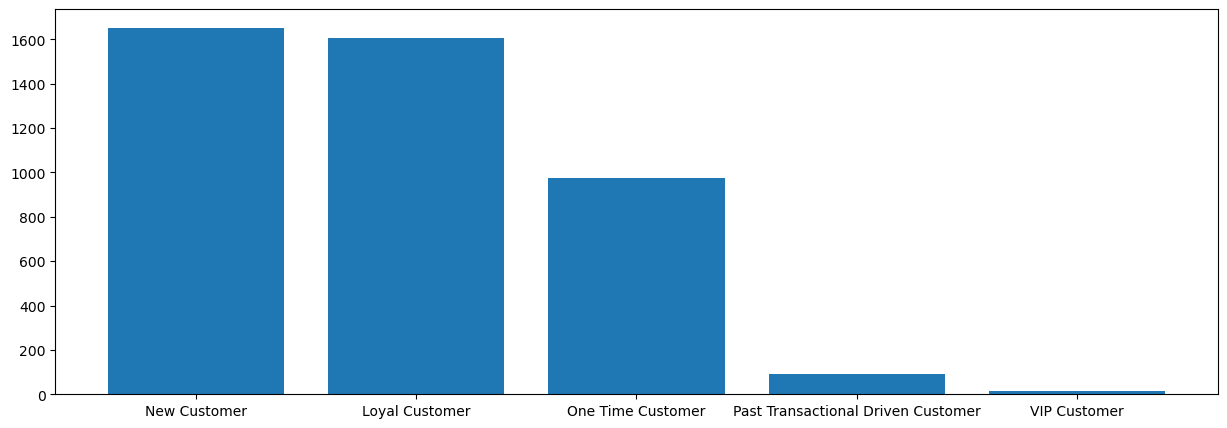

In [186]:
plt.figure(figsize=(15,5))
plt.bar(merged_df["Segment"].value_counts().index, merged_df["Segment"].value_counts().values)

In [187]:
cluster_Description = pd.DataFrame({"Cluster_Id" :  [0,1,2,3,4], 
            "Description" : ["One timer Customer are the customers who have purchased product long time ago and their frequency and length of association is also low.",
                             "Loyal Customers are the customer who are actively engaged in purchasing from the very long periods, although they are buying lesser quantity of products.", 
                             "VIP Customer are the customers who have long relation with the company and their spending power and volume of purchased product is high",         
                              "Past Transactional Driven Customer are the customers who have purchased good amoutn of product but in recent time they have not purchased anything.",
                            "New Customer are the customers who have purchased product recently and their volume of purchasing is also low."]})

In [188]:
cluster_Description

,Cluster_Id,Description
0,0,One timer Customer are the customers who have ...
1,1,Loyal Customers are the customer who are activ...
2,2,VIP Customer are the customers who have long r...
3,3,Past Transactional Driven Customer are the cus...
4,4,New Customer are the customers who have purcha...


In [189]:
final_data = merged_df.merge(cluster_Description, on = "Cluster_Id", how = 'left')
final_data.set_index(rfm.index, inplace = True)

In [190]:
final_data.head()

,Recency,Frequency,Monetary,Length,Volume,Cluster_Id,R_Label,F_Label,M_Label,L_Label,V_Label,Segment,Description
CustomerID,,,,,,,,,,,,,
12346.0,347,1,310.44,0,298.500000,3,High,High,High,Low,High,Past Transactional Driven Customer,Past Transactional Driven Customer are the cus...
12347.0,23,7,4310.00,365,13.799245,1,Low,High,High,High,Low,Loyal Customer,Loyal Customers are the customer who are activ...
12348.0,96,4,1770.78,282,75.016176,1,Low,High,High,High,Low,Loyal Customer,Loyal Customers are the customer who are activ...
12349.0,40,1,1491.72,0,8.643836,4,Low,Low,Low,Low,Low,New Customer,New Customer are the customers who have purcha...
12350.0,331,1,331.46,0,11.588235,0,High,Low,Low,Low,Low,One Time Customer,One timer Customer are the customers who have ...


In [195]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
